In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fruit_dataset.csv')
print(data.shape)
data.head()

(61, 6)


,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [3]:
data.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

In [4]:
data.fruit_label.value_counts()

1    19
3    19
4    16
2     5
5     2
Name: fruit_label, dtype: int64

In [5]:
X = data.iloc[:, 2:6]

In [6]:
X

,mass,width,height,color_score
0,192,8.4,7.30,0.55
1,180,8.0,6.80,0.59
2,176,7.4,7.20,0.60
3,86,6.2,4.70,0.80
4,84,6.0,4.60,0.79
...,...,...,...,...
56,116,5.9,8.10,0.73
57,152,6.5,8.50,0.72
58,118,6.1,8.10,0.70
59,201,7.7,10.10,0.71


In [7]:
from scipy.stats import zscore

X = X.apply(zscore)

In [8]:
X.describe()

,mass,width,height,color_score
count,6.100000e+01,6.100000e+01,6.100000e+01,6.100000e+01
mean,-2.293248e-16,-1.459670e-15,-1.150264e-15,5.573866e-16
std,1.008299e+00,1.008299e+00,1.008299e+00,1.008299e+00
min,-1.633606e+00,-1.643624e+00,-2.586925e+00,-2.820126e+00
25%,-4.521317e-01,-5.323559e-01,-4.113714e-01,-5.618475e-01
50%,-8.292107e-02,8.501502e-02,-1.394271e-01,-1.633278e-01
75%,2.862895e-01,4.554376e-01,4.044613e-01,6.337118e-01
max,3.646106e+00,3.048396e+00,2.926744e+00,2.227791e+00


In [9]:
y = data.fruit_label

### **Preventing overfitting**

**1. Using Cross validation:**

Cross validation is a very powerful preventive measure against overfitting, with a clever idea. Create multiple mini train-validation splits within the
original train data, and use these to tune your model.

We have a standard way of doing so, called the “k-fold cross validation”. What we do here is, partition the dataset into k subsets which we call “folds”.

Then we iteratively train our model on k – 1 folds. Why? We keep the last one as a validation dataset. The last fold is called the “holdout fold”.

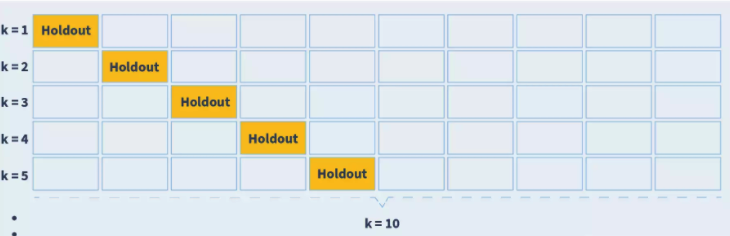



Using cross validation, you can tune your hyperparameters only with your original training dataset. This way, you can keep the validation set as a
completely unseen dataset.

K-fold cross validation might not completely remove the overfitting, so we can change the folds every now and then, or use multiple k-fold cross
validations together.

**2. Train with more data:**

The signal will be better detected by the algorithm if we train the model with more data. Although it doesn’t work every time, for example if we
just add more noisy data, then this technique won’t help.

**3. Remove Features**

In algorithms that don’t have a built-in feature selection, their generalization can be manually improved by removing some irrelevant or 
unimportant features. Why is removing features helpful? Sometimes it may happen that the model may fail to generalize simply because the model missed 
the patterns that should have been detected, and the data was too complex for the same.

**4. Add Regularization:**

As we discussed earlier, that overfitting could be a consequence of the model being too complex. Can we forcefully make it simpler? Yes!
Regularization is the term for a range of techniques that could be used to force your model into being simpler. 
The techniques used to regularize any model will depend on the model itself. 
For example, an option could be pruning a decision tree, on neural networks you could use a dropout, or, to the cost function in regression,
a penalty parameter could be added. Confusing terms eh? Google them!

### **Identifying overfitting**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [12]:
lr.fit(X_train, y_train)

LogisticRegression()

In [13]:
from sklearn import metrics

print('The training model score is:', lr.score(X_train, y_train))
print('The test model score is:', lr.score(X_test, y_test))

The training model score is: 0.8958333333333334
The test model score is: 0.6923076923076923


In [14]:
# Probably the model is learning how to identify apples, orange and lemons and 'ignoring' the mandarin and mango

data.fruit_name.value_counts()

apple       19
orange      19
lemon       16
mandarin     5
mango        2
Name: fruit_name, dtype: int64

### **Solving Overfitting in Our Dataset** : Training with more data

### **Resampling Techniques**

We can change the dataset that we are using to build our predictive model to have more balanced data.

This approach is normally referred to as sampling the dataset. There are two main methods that are typically used.


1. **Upsampling/OverSampling**
2. **DownSampling/UnderSampling**

Since our dataset is small and we want to increase it we will use *Upsampling/OverSampling* techique:

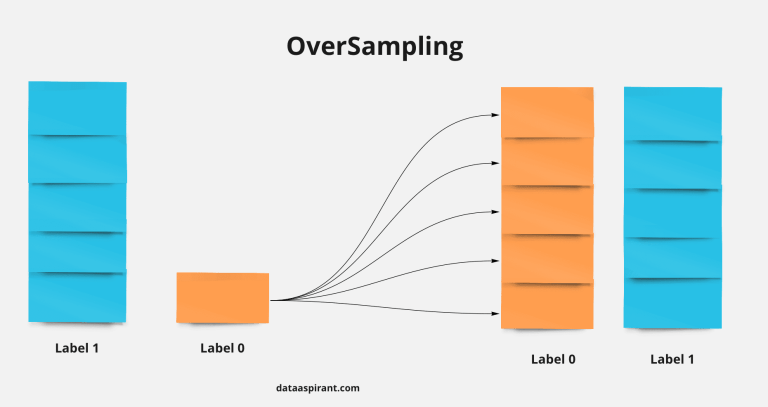

### **Upsample mandarin**

In [15]:
# separate minority and majority classes
from sklearn.utils import resample

mandarin = data[data.fruit_label == 2]
apple = data[data.fruit_label == 1]
sample_size = len(apple)-len(mandarin)

# upsample minority
mandarin_data_upsample = resample(mandarin,
                                  replace=True, #sample with replacement
                                  n_samples=sample_size, #len(apple). Matching number in the majority class
                                  random_state=42)

In [16]:
mandarin_data_upsample

,fruit_label,fruit_name,mass,width,height,color_score
6,2,mandarin,80,5.9,4.3,0.81
7,2,mandarin,76,5.8,4.0,0.81
5,2,mandarin,80,5.8,4.3,0.77
7,2,mandarin,76,5.8,4.0,0.81
7,2,mandarin,76,5.8,4.0,0.81
4,2,mandarin,84,6.0,4.6,0.79
5,2,mandarin,80,5.8,4.3,0.77
5,2,mandarin,80,5.8,4.3,0.77
5,2,mandarin,80,5.8,4.3,0.77
7,2,mandarin,76,5.8,4.0,0.81


In [17]:
include = [data, mandarin_data_upsample]

data_upsampled_mandarin = pd.concat(include, axis=0)

In [18]:
# The index is messed up

data_upsampled_mandarin.tail(20)

,fruit_label,fruit_name,mass,width,height,color_score
55,4,lemon,116,6.3,7.70,0.72
56,4,lemon,116,5.9,8.10,0.73
57,4,lemon,152,6.5,8.50,0.72
58,4,lemon,118,6.1,8.10,0.70
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
6,2,mandarin,80,5.9,4.30,0.81
7,2,mandarin,76,5.8,4.00,0.81
5,2,mandarin,80,5.8,4.30,0.77
7,2,mandarin,76,5.8,4.00,0.81


In [19]:
data_upsampled_mandarin = data_upsampled_mandarin.reset_index(drop=True)

In [20]:
data_upsampled_mandarin.tail(20)

,fruit_label,fruit_name,mass,width,height,color_score
55,4,lemon,116,6.3,7.70,0.72
56,4,lemon,116,5.9,8.10,0.73
57,4,lemon,152,6.5,8.50,0.72
58,4,lemon,118,6.1,8.10,0.70
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
61,2,mandarin,80,5.9,4.30,0.81
62,2,mandarin,76,5.8,4.00,0.81
63,2,mandarin,80,5.8,4.30,0.77
64,2,mandarin,76,5.8,4.00,0.81


In [21]:
data_upsampled_mandarin.fruit_name.value_counts()

apple       19
mandarin    19
orange      19
lemon       16
mango        2
Name: fruit_name, dtype: int64

In [22]:
# separate minority and majority classes
from sklearn.utils import resample

mango = data[data.fruit_label == 5]
apple = data[data.fruit_label == 1]
sample_size = len(apple)-len(mango)

# upsample minority
mango_data_upsample = resample(mango,
                                  replace=True, #sample with replacement
                                  n_samples=sample_size, #len(apple). Matching number in the majority class
                                  random_state=42)

In [23]:
mango_data_upsample

,fruit_label,fruit_name,mass,width,height,color_score
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
59,5,mango,201,7.7,10.10,0.71
60,5,mango,209,8.1,12.11,0.78


In [24]:
include = [data_upsampled_mandarin, mango_data_upsample]

data_upsampled = pd.concat(include, axis=0)

In [25]:
data_upsampled = data_upsampled.reset_index(drop=True)
data_upsampled

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.30,0.55
1,1,apple,180,8.0,6.80,0.59
2,1,apple,176,7.4,7.20,0.60
3,2,mandarin,86,6.2,4.70,0.80
4,2,mandarin,84,6.0,4.60,0.79
...,...,...,...,...,...,...
87,5,mango,201,7.7,10.10,0.71
88,5,mango,201,7.7,10.10,0.71
89,5,mango,209,8.1,12.11,0.78
90,5,mango,201,7.7,10.10,0.71


In [26]:
data_upsampled.fruit_name.value_counts()

apple       19
mandarin    19
orange      19
mango       19
lemon       16
Name: fruit_name, dtype: int64